# Imports and data loading

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pertpy as pt
import scanpy as sc
import json
import pickle
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

Global seed set to 0
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/home/icb/leonie.pohl/mambaforge/envs/scanpy/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [69]:
import matplotlib.pyplot as plt

adata needs "celltype" and "label" as columns of adata.obs --> add 

In [9]:
#adata.obs["cell_type"] = adata.obs["manual_celltype_annotation_fine_leiden03"] 
#adata.obs["label"] = adata.obs["SAMP_condition"]

In [10]:
#random_forest_classifier or logistic_regression_classifier for categorical data 
#ag_rfc = pt.tl.Augur("random_forest_classifier")
#loaded_data = ag_rfc.load(adata)

In [3]:
adata = sc.read("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_harmonized_doublet.h5ad")

# Augur on each dataset 

In [17]:
adata.obs["fibrotic/control"].value_counts()

fibrotic/control
fibrotic    304601
control     231307
Name: count, dtype: int64

In [11]:
adata.obs["fibrotic/control"] = adata.obs["condition"].apply(lambda x: "control" if x == "untreated" or x == "saline" else "fibrotic")

In [ ]:
datasets = [
   # 'galapagos_bleo',
    #'galapagos_rad', 
   # 'misharin',
    'peyser', 'schiller',
       'tsukui', 'xie']
for x in datasets: 
    print(x)
    subset = adata[adata.obs["dataset"].isin([x])]
    subset.obs["cell_type"] = subset.obs["harmonized_anno"] 
    subset.obs["label"] = subset.obs["fibrotic/control"]

    ag_rfc = pt.tl.Augur("random_forest_classifier")
    loaded_data = ag_rfc.load(subset)

    h_adata, h_results = ag_rfc.predict(loaded_data, subsample_size=20, n_threads=4)
    #save summary metrics 
    h_results["summary_metrics"].to_pickle("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/summary_metrics_"+x+".pkl")  


    
    with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'wb') as fp:
        pickle.dump(h_results, fp)
    
    del h_adata.uns["augurpy_results"]
    # save hdata 
    h_adata.write("/home/icb/leonie.pohl/data/augur_"+x+".h5ad")

    # save lolipop plots
    #lollipop = pt.pl.ag.lollipop(h_results)

    #important_features = pt.pl.ag.important_features(h_results)
    
    
    


In [3]:
galapagos_bleo = sc.read("/home/icb/leonie.pohl/data/augur_galapagos_bleo.h5ad")
misharin = sc.read("/home/icb/leonie.pohl/data/augur_misharin.h5ad")
schiller = sc.read("/home/icb/leonie.pohl/data/augur_schiller.h5ad")
galapagos_rad = sc.read("/home/icb/leonie.pohl/data/augur_galapagos_rad.h5ad")
xie = sc.read("/home/icb/leonie.pohl/data/augur_xie.h5ad")
peyser = sc.read("/home/icb/leonie.pohl/data/augur_peyser.h5ad")
tsukui = sc.read("/home/icb/leonie.pohl/data/augur_tsukui.h5ad")

In [4]:
results= {
    "galapagos_bleo":galapagos_bleo, 
    "misharin":misharin, 
    "schiller":schiller,
    "galapagos_rad":galapagos_rad,
    "xie":xie,
    "peyser":peyser,
    "tsukui":tsukui
    
}
adata = ad.concat(results, join="outer", axis = 0)#.obs

In [28]:
adata.write("/lustre/groups/ml01/workspace/daniel.michaela.masterpraktikum23/all_datasets_merged/complete_merged_public_and_galapagos_harmonized_doublet.h5ad")

# augur results in Umap of all datasets 

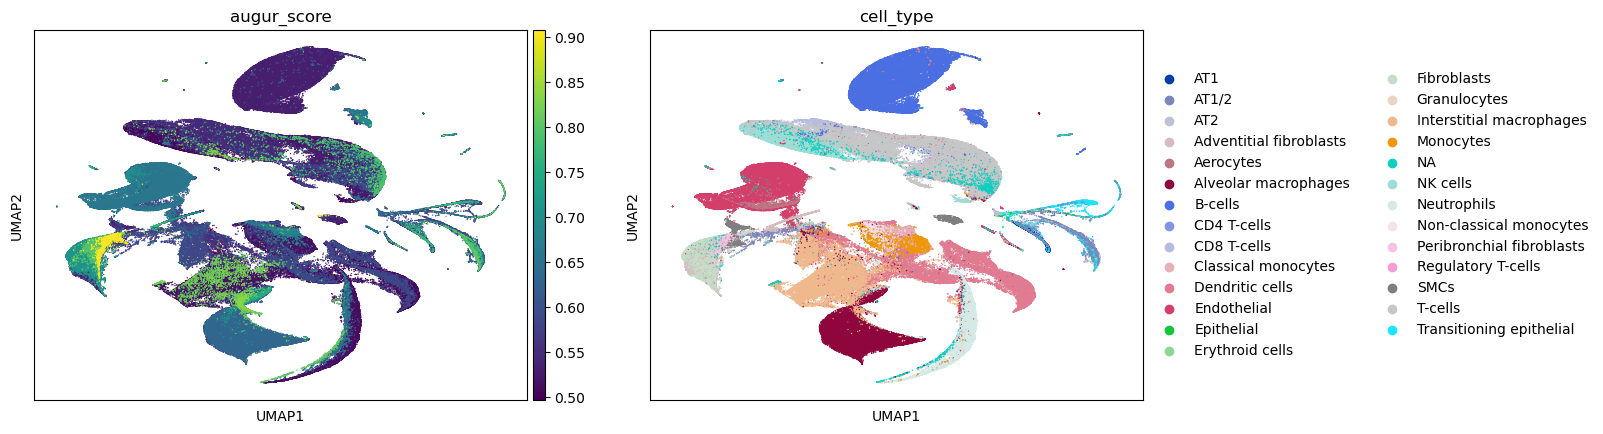

In [66]:
sc.pl.umap(adata, color=["augur_score", "cell_type"], size=4 )

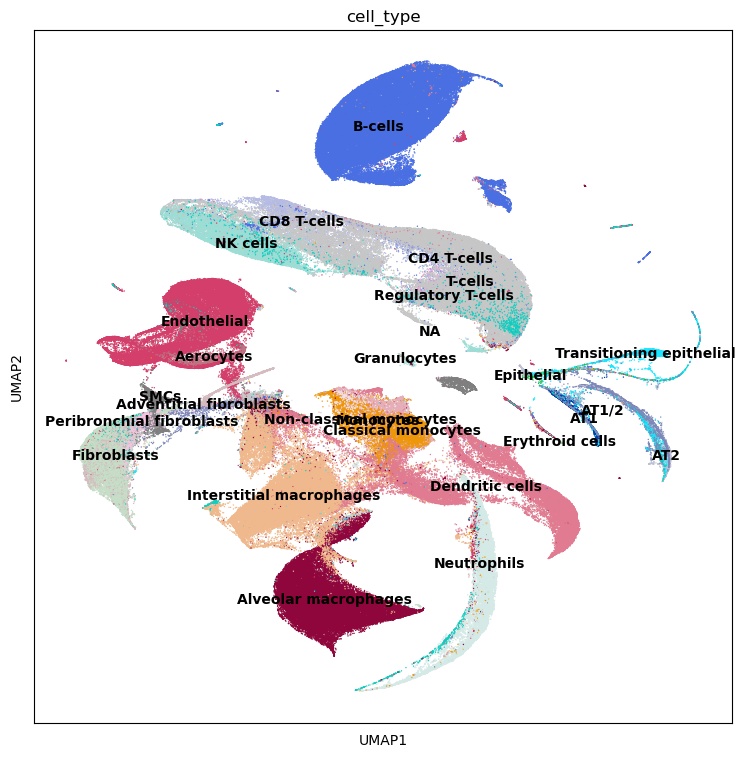

In [71]:
plt.rcParams['figure.figsize'] = (9,9)
sc.pl.umap(adata, color=["cell_type"], size=4, legend_loc= "on data")

NotImplementedError: No fallback for null labels has been defined if NA already in categories.

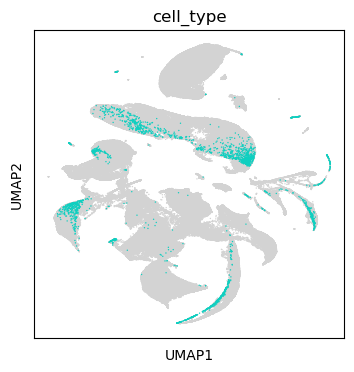

In [73]:
plt.rcParams['figure.figsize'] = (4,4)
sc.pl.umap(adata, color=["cell_type"], groups="NA", size=4, legend_loc= "on data")

--> highest mean_augur score (highest pertubation confidence) in Fibroblasts, Interstitial macrophages, epitheial, NA near Neutrophil cluster 

# galapagos_bleo augur results

In [45]:
x = "galapagos_bleo"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

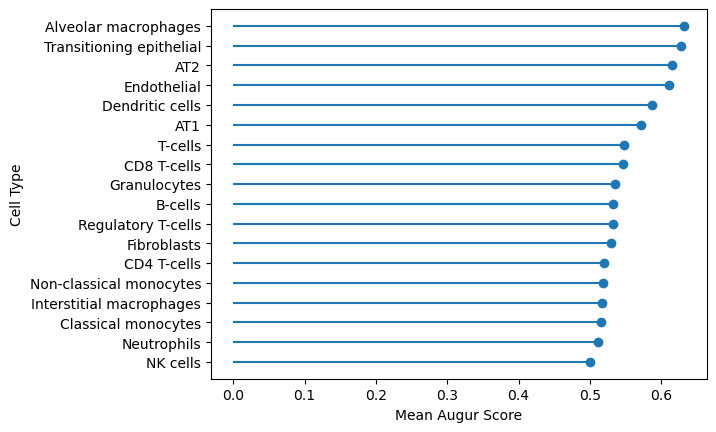

In [46]:
lollipop = pt.pl.ag.lollipop(h_results)

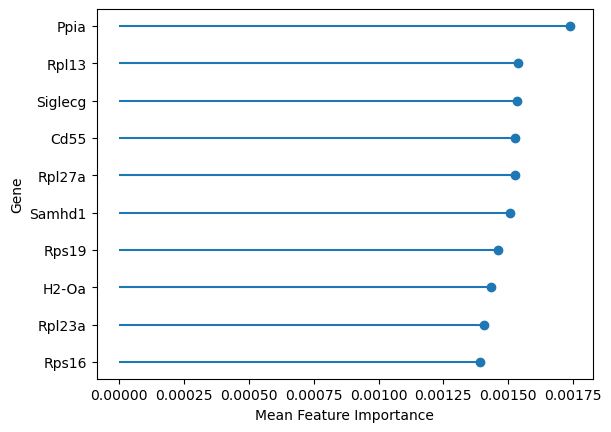

In [47]:
important_features = pt.pl.ag.important_features(h_results)

# galapagos_rad augur results

In [48]:
x = "galapagos_rad"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

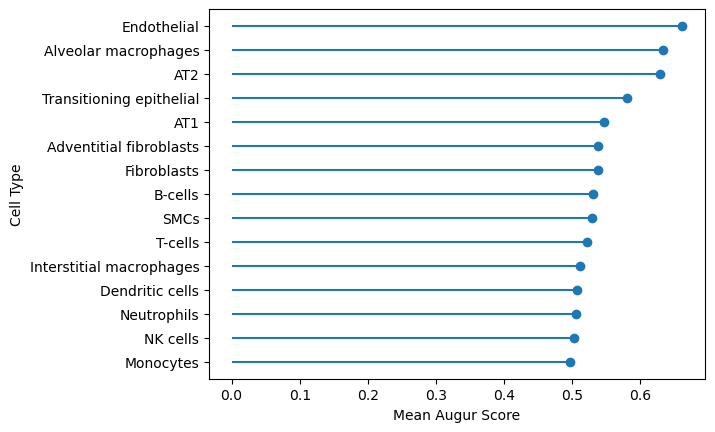

In [49]:
lollipop = pt.pl.ag.lollipop(h_results)

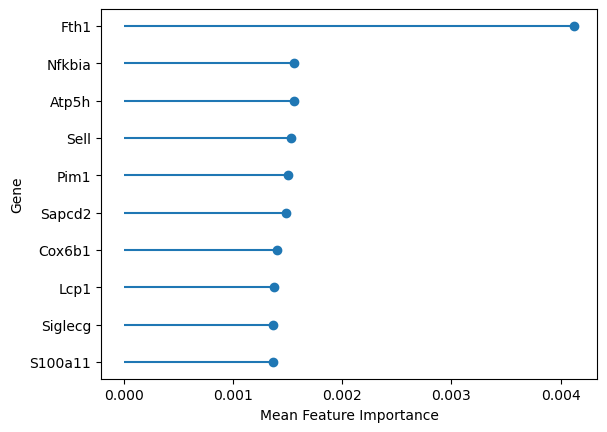

In [50]:
important_features = pt.pl.ag.important_features(h_results)

# peyser augur results

In [51]:
x = "peyser"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

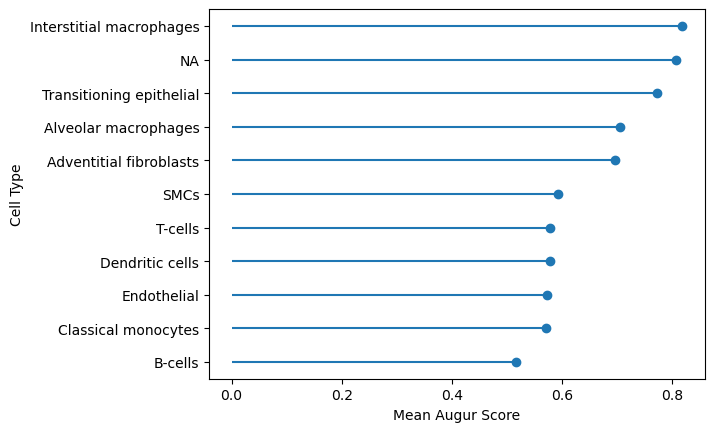

In [52]:
lollipop = pt.pl.ag.lollipop(h_results)

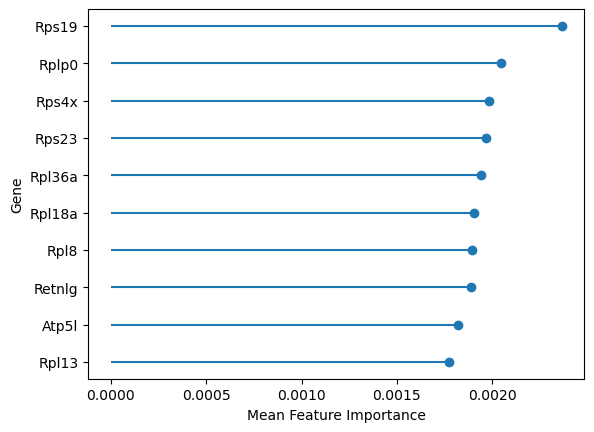

In [53]:
important_features = pt.pl.ag.important_features(h_results)

# schiller augur results

In [54]:
x = "schiller"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

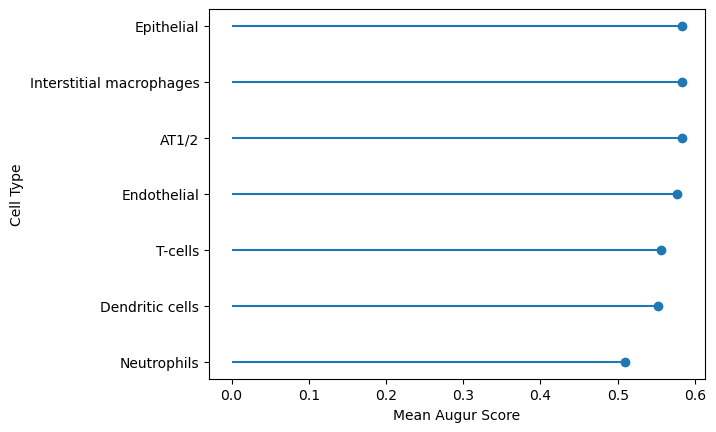

In [55]:
lollipop = pt.pl.ag.lollipop(h_results)

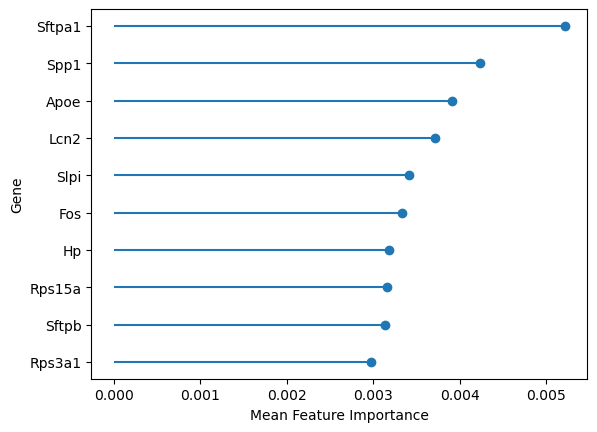

In [56]:
important_features = pt.pl.ag.important_features(h_results)

# xie augur results

In [57]:
x = "xie"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

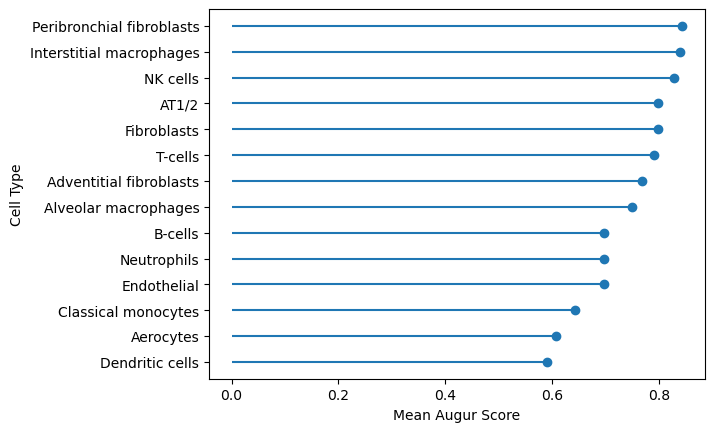

In [58]:
lollipop = pt.pl.ag.lollipop(h_results)

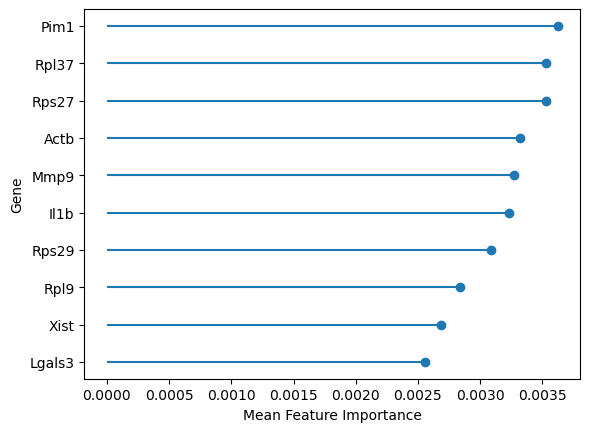

In [59]:
important_features = pt.pl.ag.important_features(h_results)

# misharin augur results

In [60]:
x = "misharin"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

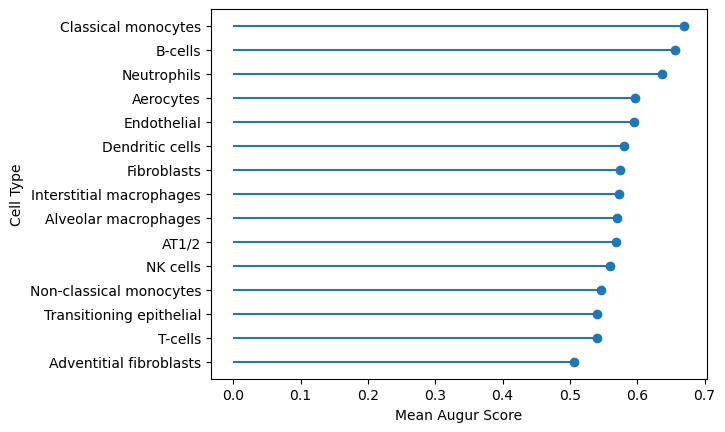

In [61]:
lollipop = pt.pl.ag.lollipop(h_results)

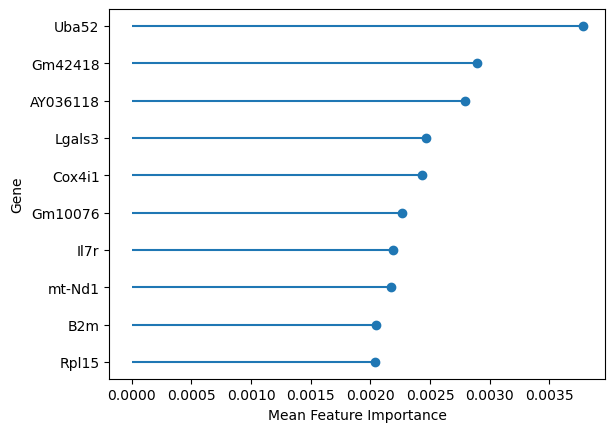

In [62]:
important_features = pt.pl.ag.important_features(h_results)

# tsukui augur results

In [63]:
x = "tsukui"
with open("/home/icb/leonie.pohl/masterpraktikum_fibrosis_atlas/notebooks/Pertpy/Output_augur/all_metrics"+x+".json", 'rb') as fp:
    h_results = pickle.load(fp)

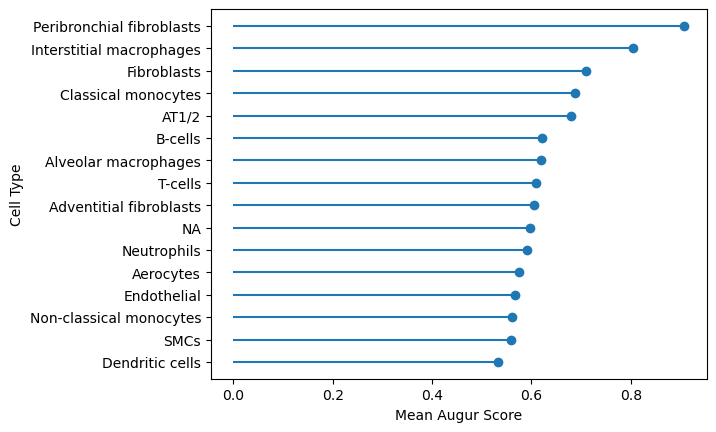

In [64]:
lollipop = pt.pl.ag.lollipop(h_results)

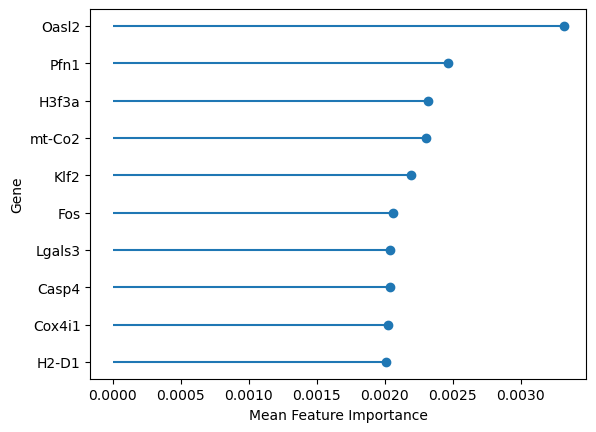

In [65]:
important_features = pt.pl.ag.important_features(h_results)